STROKE DATASET-TO PREDICT WHETHER A PERSON WILL HAVE STROKE BASED ON THE FEATURES

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [2]:
#Load The Dataset
df=pd.read_csv("Documents/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.shape

(5110, 12)

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
#Drop 'id'
df.drop('id', axis=1, inplace=True)

In [8]:
#Check the number of null values in each column
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#Handle Missing Values
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [10]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

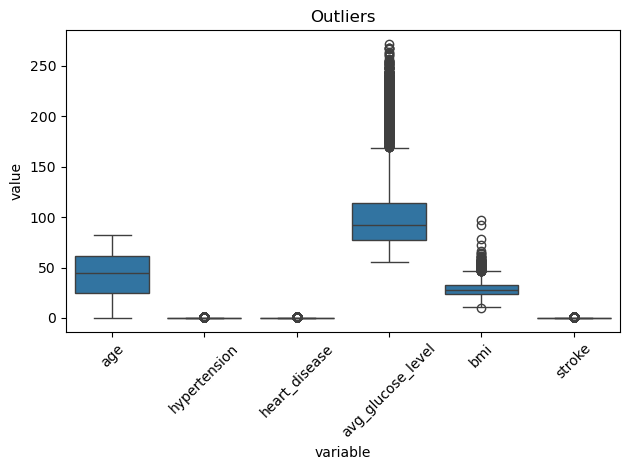

In [11]:
# Finding the ouliers in the datasets
numeric_df = df.select_dtypes(include='number')
melted = numeric_df.melt()
sns.boxplot(x='variable', y='value', data=melted)
plt.xticks(rotation=45)
plt.title('Outliers')
plt.tight_layout()
plt.show()

In [12]:
#handling the outliers 
def iqr_cap(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower,upper)
iqr_cap(df, 'avg_glucose_level')
iqr_cap(df, 'bmi')


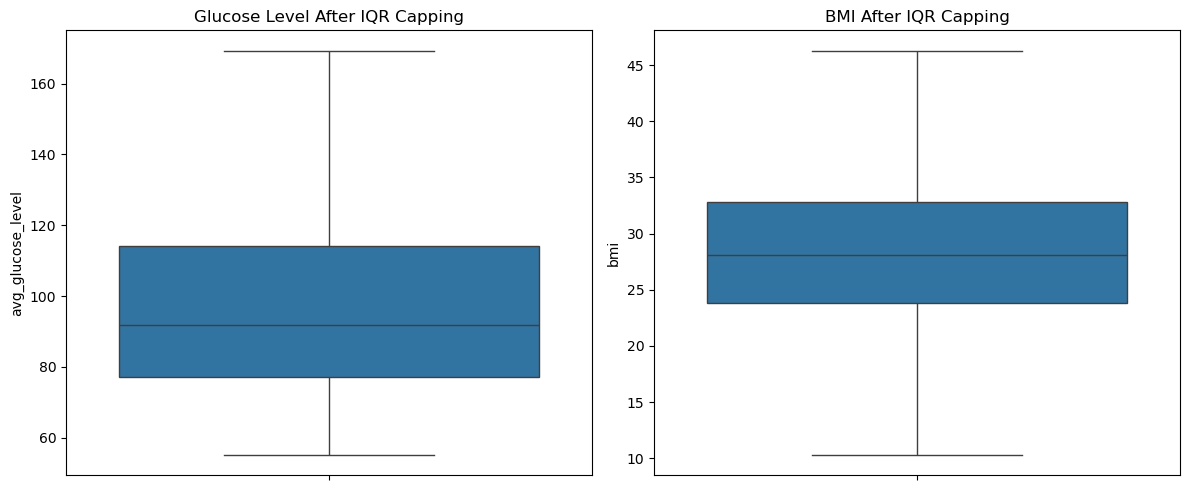

In [13]:
#Plotting the outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['avg_glucose_level'])
plt.title("Glucose Level After IQR Capping")
plt.subplot(1, 2, 2)
sns.boxplot(y=df['bmi'])
plt.title("BMI After IQR Capping")
plt.tight_layout()
plt.show()

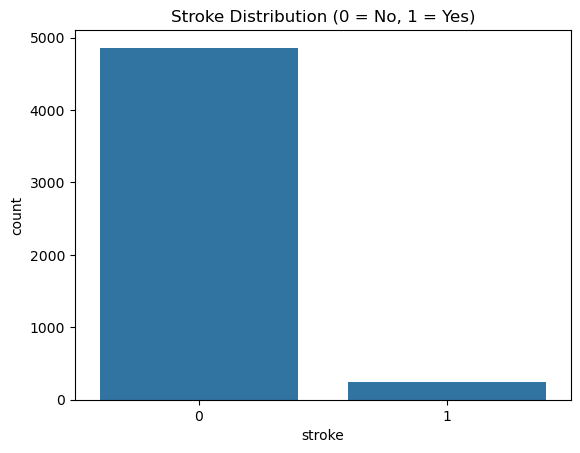

In [14]:
sns.countplot(x='stroke', data=df)
plt.title("Stroke Distribution (0 = No, 1 = Yes)")
plt.show()

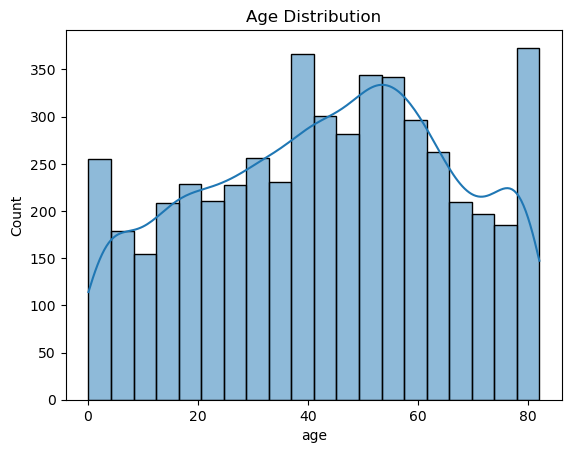

In [15]:
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

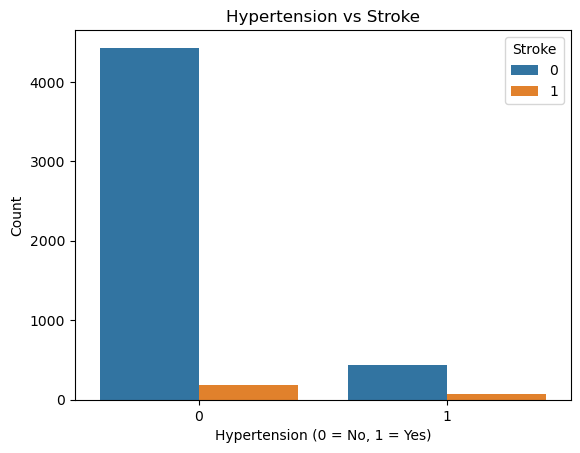

In [16]:
# Plotting hypertension vs stroke
sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title('Hypertension vs Stroke')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

In [17]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
l_gen=LabelEncoder()
l_evrmd=LabelEncoder()
l_restype=LabelEncoder()
l_worktype=LabelEncoder()
l_smoking=LabelEncoder()
df['gender']=l_gen.fit_transform(df['gender'])
df['ever_married']=l_evrmd.fit_transform(df['ever_married'])
df['Residence_type']=l_restype.fit_transform(df['Residence_type'])
df['work_type']=l_worktype.fit_transform(df['work_type'])
df['smoking_status']=l_smoking.fit_transform(df['smoking_status'])


In [18]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,169.3575,36.6,1,1
1,0,61.0,0,0,1,3,0,169.3575,28.1,2,1
2,1,80.0,0,1,1,2,0,105.9200,32.5,2,1
3,0,49.0,0,0,1,2,1,169.3575,34.4,3,1
4,0,79.0,1,0,1,3,0,169.3575,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.7500,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.2000,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.9900,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.2900,25.6,1,0


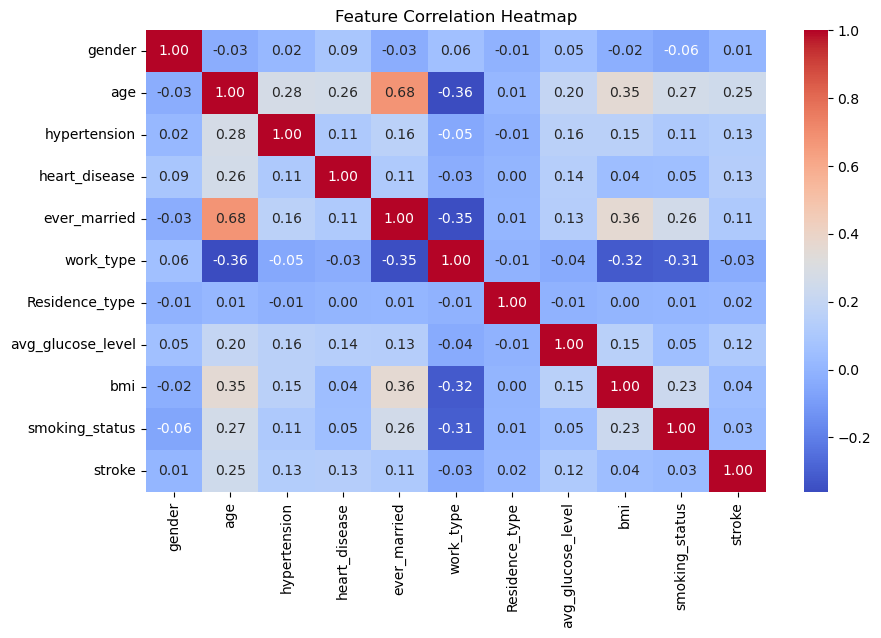

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
#  Split Features & Target
x = df.drop('stroke', axis=1)
y = df['stroke']

In [21]:
#  Handle Imbalance with SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [22]:
# Split into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [23]:
y_test.value_counts()

stroke
1    1460
0    1457
Name: count, dtype: int64

In [24]:
# . Standardize Feature
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

MODEL BUILDING

Logistic Regression

In [25]:
lr=LogisticRegression()
lr_params = {'C': [0.1, 1, 10]}
lr_grid = GridSearchCV(lr,lr_params, cv=5, scoring='f1') 
lr_grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]}, scoring='f1')

In [26]:
model_lr=lr_grid.best_estimator_
y_pred_lr=model_lr.predict(x_test_scaled)

In [27]:
print("\nLogistics Regression")
y_prob_lr = model_lr.predict_proba(x_test_scaled)[:,1]
y_pred_lr = model_lr.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_lr)) 
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr)) 
print("Classification Report:\n", classification_report(y_test, y_pred_lr))



Logistics Regression
Accuracy: 0.8131642098045938
Precision: 0.7945911139729556
Recall: 0.8452054794520548
F1 Score: 0.819117158977763
ROC AUC: 0.8907663523283911
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81      1457
           1       0.79      0.85      0.82      1460

    accuracy                           0.81      2917
   macro avg       0.81      0.81      0.81      2917
weighted avg       0.81      0.81      0.81      2917



RandomForest Classifier

In [28]:
rf=RandomForestClassifier()
rf_params = {'n_estimators': [100,150, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(rf,rf_params, cv=5, scoring='f1') 
rf_grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 150, 200]},
             scoring='f1')

In [29]:
model_rf = rf_grid.best_estimator_
y_pred_rf=model_rf.predict(x_test_scaled)

In [30]:
print("\nRandomForestClassifier")
y_prob_rf = model_rf.predict_proba(x_test_scaled)[:,1] 
y_pred_rf = model_rf.predict(x_test_scaled) 
print("Accuracy:", accuracy_score(y_test, y_pred_rf)) 
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf)) 
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



RandomForestClassifier
Accuracy: 0.9345217689406925
Precision: 0.9133550488599349
Recall: 0.9602739726027397
F1 Score: 0.9362270450751252
ROC AUC: 0.9860106147930163
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      1457
           1       0.91      0.96      0.94      1460

    accuracy                           0.93      2917
   macro avg       0.94      0.93      0.93      2917
weighted avg       0.94      0.93      0.93      2917



DecisionTreeClassifier

In [31]:
dt=DecisionTreeClassifier()
dt_params = {'max_depth': [None, 5, 10]}
dt_grid = GridSearchCV(dt,dt_params, cv=5, scoring='f1') 
dt_grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10]}, scoring='f1')

In [32]:
model_dt = dt_grid.best_estimator_
y_pred_dt=model_dt.predict(x_test_scaled)


In [33]:
print("\nDecisionTreeClassifier")
y_prob_dt = model_dt.predict_proba(x_test_scaled)[:,1] 
y_pred_dt = model_dt.predict(x_test_scaled) 
print("Accuracy:", accuracy_score(y_test, y_pred_dt)) 
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_prob_dt)) 
print("Classification Report:\n", classification_report(y_test, y_pred_dt))



DecisionTreeClassifier
Accuracy: 0.8940692492286596
Precision: 0.8793671720500988
Recall: 0.9136986301369863
F1 Score: 0.8962042324487739
ROC AUC: 0.8940490405317739
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1457
           1       0.88      0.91      0.90      1460

    accuracy                           0.89      2917
   macro avg       0.89      0.89      0.89      2917
weighted avg       0.89      0.89      0.89      2917



Support Vector Machine

In [34]:
svm=SVC()
svm_params= {'C': [0.1, 1,], 'kernel': ['linear'],'gamma': ['scale']}
svm_grid= GridSearchCV(svm,svm_params, cv=5, scoring='f1') 
svm_grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': ['scale'],
                         'kernel': ['linear']},
             scoring='f1')

In [35]:
model_svm = svm_grid.best_estimator_
y_pred_svm=model_svm.predict(x_test_scaled)

In [36]:
print("\nSupportVectorMachine")
y_pred_svm = model_svm.predict(x_test_scaled) 
print("Accuracy:", accuracy_score(y_test, y_pred_svm)) 
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_pred_svm)) 
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SupportVectorMachine
Accuracy: 0.816935207404868
Precision: 0.7919293820933165
Recall: 0.8602739726027397
F1 Score: 0.824688115561392
ROC AUC: 0.8168905895958105
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      1457
           1       0.79      0.86      0.82      1460

    accuracy                           0.82      2917
   macro avg       0.82      0.82      0.82      2917
weighted avg       0.82      0.82      0.82      2917



XGBoost

In [37]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [38]:
from xgboost import XGBClassifier

In [39]:
xgb = XGBClassifier()
xgb_params = {'n_estimators': [100],'learning_rate': [0.05],'max_depth': [3, 5]}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3,scoring='accuracy')
xgb_grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.05], 'max_depth': [3, 5],
                         'n_estimators': [100]},
             scoring='accuracy')

In [40]:
model_xgb = xgb_grid.best_estimator_
y_pred_xgb = model_xgb.predict(x_test_scaled)

In [41]:
print("\nXGBoost")
y_pred_xgb = model_xgb.predict(x_test_scaled) 
print("Accuracy:", accuracy_score(y_test, y_pred_xgb)) 
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_pred_xgb)) 
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))



XGBoost
Accuracy: 0.8817278025368529
Precision: 0.8464885021752642
Recall: 0.9328767123287671
F1 Score: 0.8875855327468231
ROC AUC: 0.8816751440847679
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88      1457
           1       0.85      0.93      0.89      1460

    accuracy                           0.88      2917
   macro avg       0.89      0.88      0.88      2917
weighted avg       0.89      0.88      0.88      2917



Naive Bayes

In [42]:
model_nb = GaussianNB()
model_nb.fit(x_train_scaled, y_train)

GaussianNB()

In [43]:

print("\nNaive Bayes")
y_pred_nb = model_nb.predict(x_test_scaled)
y_prob_nb = model_nb.predict_proba(x_test)[:,1]
print("Accuracy:", accuracy_score(y_test, y_pred_nb)) 
print("Precision:", precision_score(y_test, y_pred_nb)) 
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb)) 
print("ROC AUC:", roc_auc_score(y_test, y_prob_nb)) 
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes
Accuracy: 0.790195406239287
Precision: 0.7560386473429952
Recall: 0.8575342465753425
F1 Score: 0.803594351732991
ROC AUC: 0.3492297458654958
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.77      1457
           1       0.76      0.86      0.80      1460

    accuracy                           0.79      2917
   macro avg       0.80      0.79      0.79      2917
weighted avg       0.80      0.79      0.79      2917



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


KNNeighbors Classifier

In [44]:
knn=KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5], 'weights': ['uniform', 'distance'],'metric': ['euclidean']}
knn_grid= GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean'], 'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [45]:
model_knn= knn_grid.best_estimator_
y_pred_knn = model_knn.predict(x_test_scaled)

In [46]:
print("\nKNeighborsClassifier")
y_pred_knn = model_knn.predict(x_test_scaled)
y_prob_knn = model_knn.predict_proba(x_test)[:,1]
print("Accuracy:", accuracy_score(y_test, y_pred_knn)) 
print("Precision:", precision_score(y_test, y_pred_knn)) 
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn)) 
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn)) 
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNeighborsClassifier


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.8889269797737401
Precision: 0.8446601941747572
Recall: 0.9534246575342465
F1 Score: 0.8957528957528957
ROC AUC: 0.4406760936809545
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      1457
           1       0.84      0.95      0.90      1460

    accuracy                           0.89      2917
   macro avg       0.90      0.89      0.89      2917
weighted avg       0.90      0.89      0.89      2917



Save the Best Model, scaler and encoders  using  joblib

In [47]:
import joblib
joblib.dump(model_rf,open('model_rf.pkl','wb')) #save model
joblib.dump(scaler,open('scaler.pkl','wb')) #save scaler
joblib.dump(l_gen,open('l_gen.pkl','wb')) #labelencoder for gender
joblib.dump(l_evrmd,open('l_evrmd.pkl','wb'))
joblib.dump(l_restype,open('l_restype.pkl','wb'))
joblib.dump(l_worktype,open('l_worktype.pkl','wb'))
joblib.dump(l_smoking,open('l_smoking.pkl','wb'))

In [48]:
model_rf=joblib.load(open('model_rf.pkl','rb'))
scaler=joblib.load(open('scaler.pkl','rb'))
l_gen=joblib.load(open('l_gen.pkl','rb'))
l_restype=joblib.load(open('l_restype.pkl','rb'))
l_evrmd=joblib.load(open('l_evrmd.pkl','rb'))
l_worktype=joblib.load(open('l_worktype.pkl','rb'))
l_smoking=joblib.load(open('l_smoking.pkl','rb'))

Prediction

In [ ]:
gender = input("Enter gender (Male, Female, Other): ")
age = float(input("Enter age: "))
hypertension = int(input("Has hypertension? (0 = No, 1 = Yes): "))
heart_disease = int(input("Has heart disease? (0 = No, 1 = Yes): "))
ever_married = input("Ever married? (Yes or No): ")
work_type = input("Enter work type (Private, Self-employed, Govt_job, children, Never_worked): ")
residence_type = input("Enter residence type (Urban or Rural): ")
avg_glucose_level = float(input("Enter average glucose level: "))
bmi = float(input("Enter BMI: "))
smoking_status = input("Smoking status (formerly smoked, never smoked, smokes, Unknown): ")


data = {
    'gender': [gender],
    'age': [age],
    'hypertension': [hypertension],
    'heart_disease': [heart_disease],
    'ever_married': [ever_married],
    'work_type': [work_type],
    'Residence_type': [residence_type],
    'avg_glucose_level': [avg_glucose_level],
    'bmi': [bmi],
    'smoking_status': [smoking_status]
}
df = pd.DataFrame(data)

# Encode categorical values
df['gender'] = l_gen.transform(df['gender'])
df['ever_married'] = l_evrmd.transform(df['ever_married'])
df['Residence_type'] = l_restype.transform(df['Residence_type'])
df['work_type'] = l_worktype.transform(df['work_type'])
df['smoking_status'] = l_smoking.transform(df['smoking_status'])

# Scale numerical featuresY
df_scaled = scaler.transform(df)
# Predict
predict= model_rf.predict(df_scaled)[0]
# Output
if predict == 1:
    print(f"The person is likely to have a stroke")
else:
    print(f"The person is not likely to have a stroke")